# Исследование объявлений о продаже квартир

### Краткое описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

### Цель проекта

Научиться определять рыночную стоимость объектов недвижимости. 
Для этого необходимо установить *параметры*. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Описание данных

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from numpy import round

warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
#Изучим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#Посмотрим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

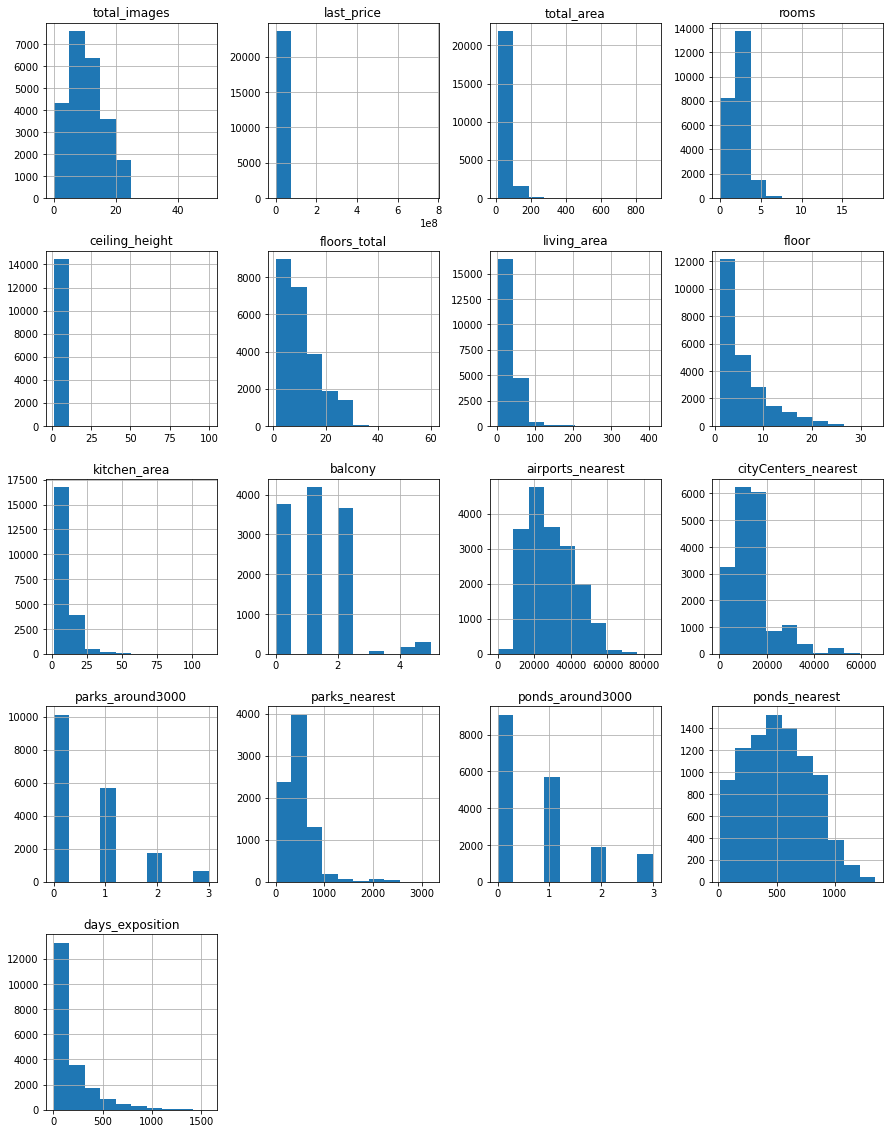

In [5]:
#Построим гистограммы для каждого параметра
data.hist(grid=True, figsize=(15,20))
plt.show()

Первые выводы, которые можно сделать из графиков:
- Прикрепляют 5-10 фотографий 
- Недвижимость оценивается менее, чем в 80 000 000
- Площадь квартиры составляет до 100 метров
- Количество комнат 2 или 3
- Высота потолков менее 10 метров
- В доме 5 этажей
- Жилая площадь 50 кв.м.
- Недвижимость находится преимущественно до 5 этажа
- Площадь кухни 13 кв.м. 
- Балконов 0-2 (данных мало)
- До аэропорта 18-27 км
- Расстояние до центра 9-20 км
- Парков поблизости нет или 1
- Расстояние до парка 400-600 м (данных мало)
- Парков нет или 1 (данных мало)
- Расстояние до прудов 350-550 м (данных мало)
- Объявления размещены на сайте 200 дней

Построим матрицу корреляции, чтобы посмотреть как столбцы связаны между собой 

In [6]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Первые выводы:
- Количество фотографий не имеет тесной явной связи с другими параметрами.
- Цена недвижимости в момент снятия с публикации имеет достаточно сильную положительную линейную связь с такими параметрами как: общая площадь, жилая площадь, площадь кухни.
- Общая площадь имеет достаточно сильную положительную линейную связь с количеством комнат, жилой площадью и площадью кухни.
- Количество комнат имеет достаточно сильную положительную линейную связь с общей и жилой площадью.
- Высота потолков не имеет тесной явной связи с другими параметрами.
- Этаж недвижимости и общее количество этажей коррелируют между собой.
- Жилая площадь имеет достаточно сильную положительную линейную связь с количеством комнат и общей площадью.
- Для студий и недвижимости со свободной планировкой отсутствует информация о корреляции с площадью кухни, это логично, учитывая, что нет отдельной кухни как таковой. Попробуем исправить это на моменте заполнения пропусков в данных. Но т.к. эти столбцы имеют булев тип данных, то информации они всё равно не дадут. С остальными параметрами тесной явной связи нет.
- Количество балконов, расстояние до центра города, наличие и расстояние до парков и прудов, количество дней публикации объявления не имеют тесной явной связи с другими параметрами.

# Предобработка данных

Переименуем столбец `cityCenters_nearest` в `city_centers_nearest`

In [7]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

## Обработка пропущенных значений

### Высота потолков 

In [8]:
#Посчитаем процент пропусков
print(f"Процент пропусков в данных о высоте потолков: {data['ceiling_height'].isna().sum() / len(data['ceiling_height']):.1%}")

Процент пропусков в данных о высоте потолков: 38.8%


Заменим часть пропусков, руководствуясь такой логикой: *у типовых построек с определённой этажностью типовая высота потолков*, найдём среднее и медиану высоты потолков, отталкиваясь от количества этажей в доме, сравним их и решим какими значениями будет лучше их заполнить.

Значения высоты потолков для разных типов недвижимости:
- Новостройки 2,5-3,2 м
- Хрущёвки 2,5 м
- Брежневки 2,5 м
- Сталинки 3-3,5 м
- Стандартные 9-этажки 2,6-2,8 м

In [9]:
#Посчитаем процент пропусков
print(f"Процент пропусков в данных о количестве этажей: {data['floors_total'].isna().sum() / len(data['floors_total']):.1%}")

Процент пропусков в данных о количестве этажей: 0.4%


Столбец `floors_total` с количеством этажей в доме так же содержит пропуски, точно сказать какими именно значениями заполнить эти пропуски не представляется возможным, удалим их.

In [10]:
data = data.dropna(subset=['floors_total'])

In [11]:
data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['mean', 'median'])

,mean,median
,ceiling_height,ceiling_height
floors_total,,
1.0,2.740000,2.80
2.0,3.006791,2.70
3.0,2.969474,2.80
4.0,2.986831,3.00
5.0,2.793191,2.55
6.0,3.120743,3.00
7.0,2.946960,3.00
8.0,2.856818,2.80


In [12]:
#Из сводной таблицы видно, что значения медиан и среднего не сильно отличаются, заполним пропуски значениями медиан
for floor in data['floors_total'].unique():
    data.loc[(data['floors_total'] == floor) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == floor), 'ceiling_height'].median()

In [13]:
data['ceiling_height'].isna().sum()

1

In [14]:
data = data.dropna(subset=['ceiling_height'])

### Жилая площадь

In [15]:
#Посчитаем процент пропусков в данных 
print(f"Процент пропусков в данных о жилой площади: {data['living_area'].isna().sum() / len(data['living_area']):.1%}")

Процент пропусков в данных о жилой площади: 7.9%


Заполним пропуски, опираясь на данные о количестве комнат в недвижимости. Сравним медианные и средние значения.

In [16]:
data.pivot_table(index='rooms', values='living_area', aggfunc=['mean', 'median'])

,mean,median
,living_area,living_area
rooms,,
0,18.865246,18.000
1,17.900308,17.600
2,31.736574,30.500
3,47.383662,45.000
4,66.936136,63.500
5,100.009247,91.785
6,131.799796,124.400
7,163.564151,145.000


In [17]:
#Отличия между средним и медианой небольшие, используем медианные значения
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].median()

### Апартаменты

In [18]:
#Посчитаем процент пропусков
print(f"Процент пропусков в данных об апартаментах: {data['is_apartment'].isna().sum() / len(data['is_apartment']):.1%}")

Процент пропусков в данных об апартаментах: 88.3%


Это может быть связано с тем, что параметр "Статус: апартаменты или жилая недвижимость" не является обязательным полем для заполнения в Яндекс.Недвижимости. 

Можно предположить, что *параметр оставляли пустым т.к. квартира не является апартаментами*, заполним столбец значением False.

In [19]:
data['is_apartment'].fillna(value=False, inplace=True)

In [20]:
data['is_apartment'].isna().sum()

0

### Площадь кухни

In [21]:
#Посчитаем процент пропусков
print(f"Процент пропусков в данных о площади кухни: {data['kitchen_area'].isna().sum() / len(data['kitchen_area']):.1%}")

Процент пропусков в данных о площади кухни: 9.4%


Пропуски в столбце с площадью кухни могут быть связаны с тем, что данные не заполнялись для квартир-студий и апартаментов. Проверим.

In [22]:
data.query('kitchen_area.isna() and (studio or is_apartment)').shape[0] / data.query('kitchen_area.isna()').shape[0]

0.07216494845360824

Пропуски в площади кухонь для квартир-студий и апартаментов составляют 7,2% от общего числа пропусков, нельзя точно утвержать, что эти данные связаны.

Т.к. апартаменты не являются жилым помещением, то теоретически они могут не иметь кухни, поэтому для них заполним столбец с площадью кухни 0.

Для всех квартир-студий значения так же отсутствуют, будем исходить из того, что кухня в них отсутсвует как отдельное помещение и заполним пропуски 0.

Остальные пропуски оставим без изменений.

In [23]:
data.loc[(data['is_apartment'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = data['kitchen_area'].fillna(0)
data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'].fillna((data['kitchen_area'].mean() / data['total_area'].mean()), inplace=True)

In [24]:
data['kitchen_area'].isna().sum()

0

### Количество балконов

In [25]:
#Посчитаем процент пропусков
print(f"Процент пропусков в данных о количестве балконов: {data['balcony'].isna().sum() / len(data['balcony']):.1%}")

Процент пропусков в данных о количестве балконов: 48.6%


Можно предположить, что количество балконов не заполнялось, т.к. они отсутствуют. Исходя из этого заполним пропуски 0.

In [26]:
data['balcony'] = data['balcony'].fillna(0)

### Название населённого пункта

In [27]:
#Посчитаем процент пропусков
print(f"Процент пропусков в данных : {data['locality_name'].isna().sum() / len(data['locality_name']):.1%}")

Процент пропусков в данных : 0.2%


Т.к эти данные получены автоматически и у нас нет связи с разработчиками, нет возможности точно узнать в каком населённом пункте находится недвижимость, удалим пропуски.

In [28]:
data = data.dropna(subset=['locality_name'])

### Автоматические данные на основе картографических данных

В датасете присутствует большое количество пропусков для столбцов: 
- расстояние до аэропорта `airport_nearest`
- расстояние до центра города `cityCenters_nearest`
- число парков в радиусе 3 км `parks_around3000`
- расстояние до ближайшего парка `parks_nearest`
- число водоёмов в радиусе 3 км `ponds_around3000`
- расстояние до ближайшего водоёма `ponds_nearest`. 

Т.к. это информация технического характера, то заполнить самостоятельно мы её не может, оставим пропуски  без изменения.

Но что интересно, пропуски для столбцов число парков в радиусе 3 км `parks_around3000`, число прудов в радиусе 3 км `ponds_around3000`, вполне объяснимы, в данном радиусе нет парков и водоёмов, но почему отсутствует остальная информация не совсем понятно, только если она так же ограничена определённым радиусом, но неявно, хотя стоило бы это указать в описании данных датасета, иначе закрадывается мысль об ошибке выгрузки.

### Количество дней размещения объявления

In [29]:
#Посчитаем процент пропусков
print(f"Процент пропусков в данных о : {data['days_exposition'].isna().sum() / len(data['days_exposition']):.1%}")

Процент пропусков в данных о : 13.5%


Можно предположить, что объявления были удалены менее чем через сутки после публикации, либо же объявление находится в черновиках и так и не было опубликовано. Т.к. у нас нет возможности узнать у разработчиков, как работаёт счётчик дней, оставим пропуски без изменений.

In [30]:
#Сбросим индексы после очистки данных
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,False,False,False,0.173763,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23559,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23560,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.0,4,False,False,False,8.500000,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23561,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.7,1,False,False,False,0.173763,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23562,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.5,12,False,False,False,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


## Изменение типов данных

Изменим тип данных для столбцов:
- общее количество этажей `floors_total` на int8
- количество балконов `balcony` на int8
- дата публикации объявлений `first_day_exposition` на datetime64
- апартаменты `is_apartment` на bool

Тип данных изменим для экономии памяти и удобства работы с ними.

In [31]:
try:
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
except:
    print('Возникла ошибка при попытке сменить тип данных для first_day_exposition')
try:
    data['is_apartment'] = data['is_apartment'].astype(bool)
except:
    print('Возникла ошибка при попытке сменить тип данных для is_apartment')
try:
    data[['floors_total', 'balcony']] = data[['floors_total', 'balcony']].astype('int8')
except:
    print('Возникла ошибка при попытке сменить тип данных для floors_total и balcony')
try:
    data[['last_price', 'total_area', 'ceiling_height', 'living_area']] =\
    data[['last_price', 'total_area', 'ceiling_height', 'living_area']].astype('float32')
except:
    print('Возникла ошибка при попытке сменить тип данных на float32')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  float32       
 2   total_area            23564 non-null  float32       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  float32       
 6   floors_total          23564 non-null  int8          
 7   living_area           23564 non-null  float32       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

## Удаление неявных дубликатов

In [33]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Можем выделить несколько категорий дубликатов:
- Дубликаты с ё, вместо е, в названии типа поселения
- Синонимы, такие как :  *поселок городского типа* и *городской поселок*, *поселок станции* и *поселок при железнодорожной станции*, *садоводческое некоммерческое товарищество* и *садовое товарищество*


Заменим их

In [34]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'городской поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок при железнодорожной станции')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

In [35]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Важины', 'городской поселок Виллози',
       'городской поселок Вознесенье', 'городской поселок Вырица',
       'городской поселок Дружная Горка', 'городской поселок Дубровка',
       'городской поселок Ефимовский', 'городской поселок Кондратьево',
       'городской поселок Красный Бор', 'городс

## Устранение аномалий

### Высота потолков

In [36]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Значения для высоты потолков выше 20 разделим на 10, т.к. есть вероятность, что значения например 25 и 32 могут быть опечатками и на самом деле имелись в виду высоты 2,5 и 3,2.

In [37]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10

In [38]:
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

Согласно СП 54.13330.2016 высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) должна быть не менее 2,5 м.

Высота внутриквартирных коридоров, холлов, передних, антресолей (и под ними) определяется условиями безопасности передвижения людей и должна составлять не менее 2,1 м. 

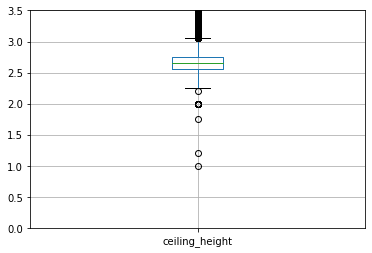

In [39]:
#Построим диаграмму размаха. Ограничим диаграмму до 3.5 метров для наглядности, выше 3.5 явные выбросы.
plt.ylim(0, 3.5)
data.boxplot(column=['ceiling_height'])
plt.show()

In [40]:
data['ceiling_height'].describe()

count    23564.000000
mean         2.710720
std          0.299079
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         20.000000
Name: ceiling_height, dtype: float64

Изучим диаграмму рассеяния и найдём точные значения для границ выбросов, для этого посчитаем межквартильный размах, он равен 0.3.

Из приведнных выше данных о высоте потолков для типовых построек и СНиПа следует, что минимальная высота потолка может быть равна 2.1 метр, а максимальная 3.5, будем ориентироваться на эти данные. От значений, которые не входят в этот диапазон, избавимся.

In [41]:
data = data.loc[~((data['ceiling_height'] <= 2.1) | (data['ceiling_height'] >= 3.5))]

In [42]:
data.loc[(data['ceiling_height'] <= 2.1) | (data['ceiling_height'] >= 3.5)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Общая площадь

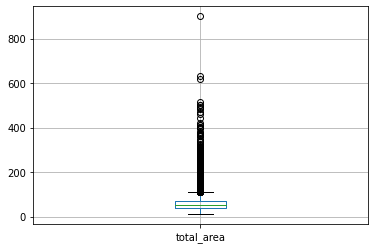

In [43]:
data.boxplot(column=['total_area'])
plt.show()

In [44]:
data['total_area'].describe()

count    23138.000000
mean        59.214573
std         33.016502
min         12.000000
25%         40.000000
50%         51.500000
75%         68.500000
max        900.000000
Name: total_area, dtype: float64

Изучим диаграмму рассеяния и найдём точные значения для границ выбросов, для этого посчитаем межквартильный размах, он равен 29.

Если ориентирвоться на полтора межквартильных размаха, нам следовало бы ограничить данные и выбрать недвижимость с общей площадью до 112.5 квадратных метров, но построим и изучим гистограмму, так же изучим минимальные значения общей площади.

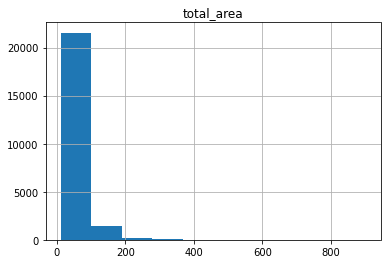

In [45]:
data.hist('total_area')
plt.show()

In [46]:
data['total_area'].sort_values().head()

19904    12.0
19807    13.0
17961    13.0
19546    13.0
19558    13.2
Name: total_area, dtype: float32

Как и ожидалось, большая часть недвижимости сосредоточена в пределах от 30 до 100 квадратных метров. 

Но так же можно заметить, что есть часть недвижимости в пределах 190 кв. метров, возможно эта элитная недвижисомть с большой площадью, будем ориентироваться на показатели общей площади до 190 кв. м. 

Так же минимальные площади квартиры составляют 12-13 м, но такая недвижимость встречается часто, особенно учитывая, что в выборке присутствуют квартиры-студии. 

Остальное будем считать аномалиями и удалим их.

In [47]:
data = data.loc[~(data['total_area'] > 190)]

In [48]:
data[(data['total_area'] > 190)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Цена на момент снятия с публикации

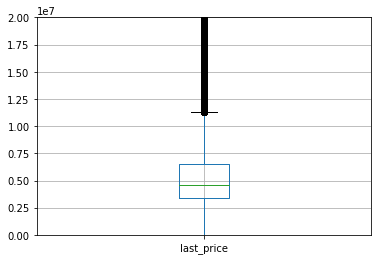

In [49]:
#Ограничим диаграмму рассеяния 
plt.ylim(0, 20000000)
data.boxplot(column=['last_price'])
plt.show()

In [50]:
data['last_price'].describe()

count        22945.0
mean       5882182.0
std        5642898.5
min          12190.0
25%        3400000.0
50%        4590000.0
75%        6550000.0
max      289238400.0
Name: last_price, dtype: float64

Изучим диаграмму рассеяния и найдём точные значения для границ выбросов, для этого посчитаем межквартильный размах, он равен 3 200 000.

Если ориентирвоться на полтора межквартильных размаха, нам следовало бы ограничить данные и выбрать недвижимость стоимостью до 11 400 000, но изучим гистограмму и минимальные значения цены.

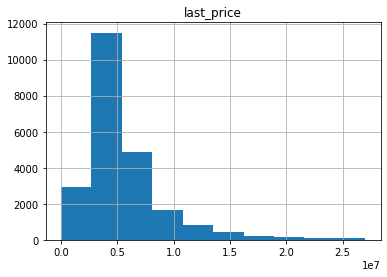

In [51]:
data.hist('last_price', range=(0, 27000000))
plt.show()

In [52]:
data['last_price'].sort_values().head()

8793      12190.0
14911    430000.0
17456    430000.0
16274    440000.0
17676    450000.0
Name: last_price, dtype: float32

Большая часть цен на недвижимость сосредоточена в пределах от 3 000 000 до 5 500 000. 

Но так же можно заметить, что есть часть недвижимости в пределах 27 000 000, будем ориентироваться на показатели цены до 27 000 000.

Так же можно заметить выброс с минимальной стоимостью 12190, удалим его.

Остальное будем считать аномалиями и удалим их.

In [53]:
data = data[~((data['last_price'] > 27000000) | (data['last_price'] == 12190))]

In [54]:
data[(data['last_price'] > 27000000) | (data['last_price'] == 12190)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Количество комнат

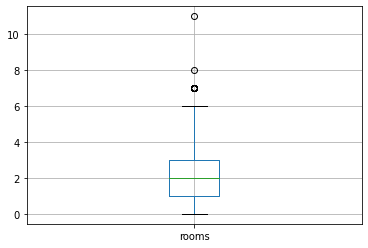

In [55]:
data.boxplot(column=['rooms'])
plt.show()

In [56]:
data['rooms'].describe()

count    22730.000000
mean         2.004311
std          0.967499
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Изучим диаграмму рассеяния и найдём точные значения для границ выбросов, для этого посчитаем межквартильный размах, он равен 2.

Если ориентирвоться на полтора межквартильных размаха, нам следовало бы ограничить данные и выбрать недвижимость с количеством комнат до 6, но изучим гистограмму.

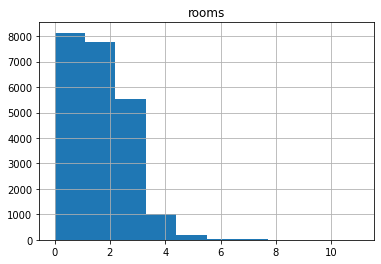

In [57]:
data.hist('rooms')
plt.show()

Большая часть недвижимости имеет до 3 комнат. 

Но так же можно заметить, что есть часть недвижимости с количеством комнат до 5, на этот показатель и будем ориентироваться.

Минимальное количество комнат 0, но это вполне объяснимо, учитывая наличие квартир-студий в выборке. Оставим их.

Остальное будем считать аномалиями и удалим.

In [58]:
data = data[~((data['rooms'] > 5))]

In [59]:
data[(data['rooms'] > 5)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Количество этажей в доме

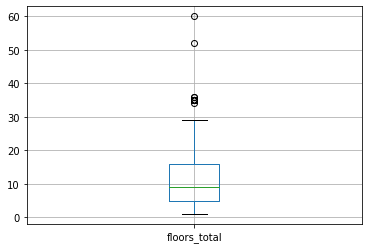

In [60]:
data.boxplot(column=['floors_total'])
plt.show()

In [61]:
data['floors_total'].describe()

count    22672.000000
mean        10.826614
std          6.625869
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Изучим диаграмму рассеяния и найдём точные значения для границ выбросов, для этого посчитаем межквартильный размах, он равен 11.

Если ориентироваться на полтора межквартильных размаха, нам следовало бы ограничить данные и выбрать недвижимость с количеством этажей до 16 , но изучим гистограмму.

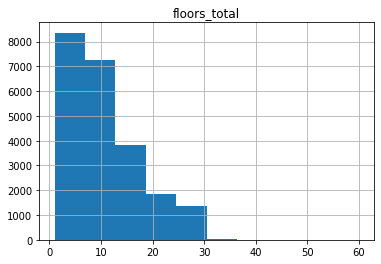

In [62]:
data.hist('floors_total')
plt.show()

In [63]:
data[(data['floors_total'] > 29)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
871,14,7777777.0,75.000000,2017-11-16,2,2.70,35,40.500000,23,False,False,False,11.700000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0
1060,10,5200000.0,50.000000,2015-11-06,2,2.70,35,39.000000,15,False,False,False,20.500000,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1697,11,3550000.0,28.000000,2018-02-08,1,2.65,34,18.000000,23,False,False,False,0.173763,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0
1917,13,10150000.0,74.000000,2017-11-17,2,2.80,35,34.400002,30,False,False,False,13.000000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
2253,12,3800000.0,45.500000,2018-06-28,2,2.88,60,27.400000,4,False,False,False,7.400000,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
2966,9,4300000.0,37.000000,2017-08-08,1,2.70,35,14.000000,15,False,False,False,10.400000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0
4855,12,5500000.0,50.000000,2017-06-22,1,2.80,35,22.000000,4,False,False,False,13.000000,0,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0
5749,20,3590000.0,25.000000,2017-08-30,0,2.80,35,18.000000,26,False,False,True,0.173763,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
5807,17,8150000.0,80.000000,2019-01-09,2,2.70,36,41.000000,13,False,False,False,12.000000,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5808,12,4590000.0,43.000000,2018-10-19,1,2.70,35,14.000000,11,False,False,False,15.000000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,82.0


При изучении дополнительной информации было выяснено, что на данный момент самое высокое жилое здание в Санкт-Петербурге и Ленинградской области имеет 37 этажей. Возьмём 37 этажей как предел. Постройки с большей этажностью удалим.

Минимальное количество этажей 1, что не является выбросом.

In [64]:
data = data[~((data['floors_total'] >= 37))]

In [65]:
data[(data['floors_total'] >= 37)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Площадь кухни

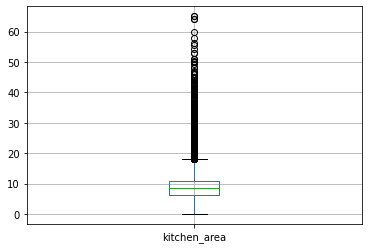

In [66]:
data.boxplot(column=['kitchen_area'])
plt.show()

In [67]:
data['kitchen_area'].describe()

count    22670.000000
mean         9.209563
std          5.483369
min          0.000000
25%          6.300000
50%          8.700000
75%         11.000000
max         65.000000
Name: kitchen_area, dtype: float64

Изучим диаграмму рассеяния и найдём точные значения для границ выбросов, для этого посчитаем межквартильный размах, он равен 4.

Если ориентирвоться на полтора межквартильных размаха, нам следовало бы ограничить данные и выбрать недвижимость с площадью кухни до 17.5 кв.м., но изучим гистограмму и минимальные значения площади кухни, кроме 0, т.к. 0 мы указывали для апартаментов и квартир-студий.

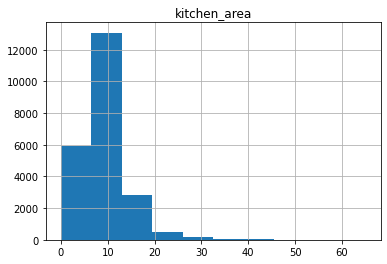

In [68]:
data.hist('kitchen_area')
plt.show()

In [69]:
data[data['kitchen_area'] != 0]['kitchen_area'].sort_values().head()

18237    0.173763
6781     0.173763
6780     0.173763
6777     0.173763
22015    0.173763
Name: kitchen_area, dtype: float64

Большая часть данных представлена в диапазоне от 7 до 12 кв.м. Но т.к. ранее мы оставляли данные с достаточно большой общей площадью квартир, возьмём предел 32.

Минимальная площадь кухни составляет 1.3 метра, что является выбросом. Удалим.

Остальные данные будем считать выбросами и удалим.

In [70]:
data = data[~((data['kitchen_area'] >= 32))]

In [71]:
data[(data['kitchen_area'] >= 32)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Количество дней размещения объявления на сайте

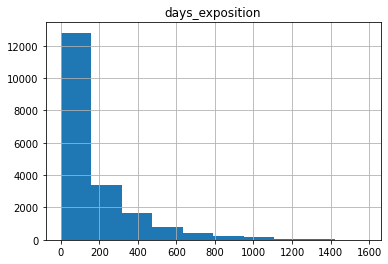

In [72]:
data.hist('days_exposition')
plt.show()

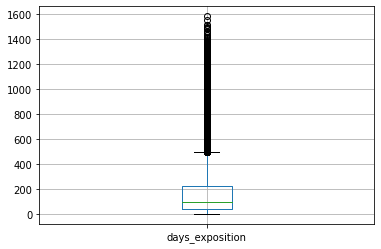

In [73]:
data.boxplot('days_exposition')
plt.show()

In [74]:
#На графике имеются явные выбросы, удалим их, ограничим максимум 2 годами.
data = data[~(data['days_exposition'] > 365 * 2)]

In [75]:
data[data['days_exposition'] > 365 * 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


## Посчитайте и добавьте в таблицу новые столбцы

### Цена одного квадратного метра

In [76]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.400002,2018-12-04,1,2.75,11,18.600000,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.000000,2015-08-20,2,2.55,5,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.299999,2017-11-02,1,2.66,26,10.600000,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [77]:
data['one_square_meter_price'] = data['last_price'] / data['total_area']

In [78]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188
1,7,3350000.0,40.400002,2018-12-04,1,2.75,11,18.600000,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062
2,10,5196000.0,56.000000,2015-08-20,2,2.55,5,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789062
6,6,3700000.0,37.299999,2017-11-02,1,2.66,26,10.600000,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710938


### День недели публикации объявления

Добавим новый столбец `day_of_week`, который будет содержать в себе день недели публикации объявления  в формате:
- 0-понедельник
- 1-вторник
- 2-среда
- 3-четверг
- 4-пятница
- 5-суббота
- 6-воскресенье

In [79]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday

In [80]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,day_of_week
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3
1,7,3350000.0,40.400002,2018-12-04,1,2.75,11,18.600000,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1
2,10,5196000.0,56.000000,2015-08-20,2,2.55,5,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789062,0
6,6,3700000.0,37.299999,2017-11-02,1,2.66,26,10.600000,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710938,3


### Месяц публикации объявления

In [81]:
data['month'] = data['first_day_exposition'].dt.month

In [82]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,day_of_week,month
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3
1,7,3350000.0,40.400002,2018-12-04,1,2.75,11,18.600000,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12
2,10,5196000.0,56.000000,2015-08-20,2,2.55,5,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789062,0,9
6,6,3700000.0,37.299999,2017-11-02,1,2.66,26,10.600000,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710938,3,11


### Год публикации объявления

In [83]:
data['year'] = data['first_day_exposition'].dt.year

In [84]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,day_of_week,month,year
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019
1,7,3350000.0,40.400002,2018-12-04,1,2.75,11,18.600000,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018
2,10,5196000.0,56.000000,2015-08-20,2,2.55,5,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789062,0,9,2018
6,6,3700000.0,37.299999,2017-11-02,1,2.66,26,10.600000,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710938,3,11,2017


### Тип этажа квартиры

In [85]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis=1)

In [86]:
data.query('floor == 1').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,day_of_week,month,year,floor_type
1,7,3350000.0,40.400002,2018-12-04,1,2.75,11,18.600000,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018,первый
14,1,4400000.0,36.000000,2016-06-23,1,3.00,6,17.000000,1,False,False,False,8.0,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222.218750,3,6,2016,первый
16,11,6700000.0,82.000000,2017-11-23,3,3.05,5,55.599998,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.320312,3,11,2017,первый
24,8,6500000.0,97.199997,2015-10-31,2,2.80,3,46.500000,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265.0,66872.429688,5,10,2015,первый
28,8,4170000.0,44.000000,2017-12-13,1,2.90,6,20.799999,1,False,False,False,11.7,1,Пушкин,18557.0,30710.0,0.0,NaN,1.0,118.0,74.0,94772.726562,2,12,2017,первый


In [87]:
data.query('floor == floors_total').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,day_of_week,month,year,floor_type
12,10,3890000.0,54.000000,2016-06-30,2,2.55,5,30.000000,5,False,False,False,9.000000,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,72037.039062,3,6,2016,последний
13,20,3550000.0,42.799999,2017-07-01,2,2.56,5,27.000000,5,False,False,False,5.200000,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.929688,5,7,2017,последний
23,11,2950000.0,32.000000,2016-10-29,1,2.60,9,17.700001,9,False,False,False,6.100000,0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0,92187.500000,5,10,2016,последний
36,13,3790000.0,45.000000,2017-01-25,2,2.55,9,27.000000,9,False,False,False,6.300000,2,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0,84222.218750,2,1,2017,последний
59,15,6300000.0,46.500000,2017-03-06,1,2.70,13,17.600000,13,False,False,False,0.173763,0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,135483.875000,0,3,2017,последний


### Расстояние до центра города в километрах

In [88]:
#Переведём из м в км и округлим до целых значений
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000)

In [89]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,day_of_week,month,year,floor_type,city_centers_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019,другой,16.0
1,7,3350000.0,40.400002,2018-12-04,1,2.75,11,18.600000,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018,первый,19.0
2,10,5196000.0,56.000000,2015-08-20,2,2.55,5,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,другой,14.0
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789062,0,9,2018,другой,NaN
6,6,3700000.0,37.299999,2017-11-02,1,2.66,26,10.600000,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710938,3,11,2017,другой,19.0


## Проведите исследовательский анализ данных

### Изучение параметров

Построим гистограммы для следующих параметры объектов:
- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- этаж квартиры
- тип этажа квартиры («первый», «последний», «другой»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего аэропорта
- расстояние до ближайшего парка
- день и месяц публикации объявления

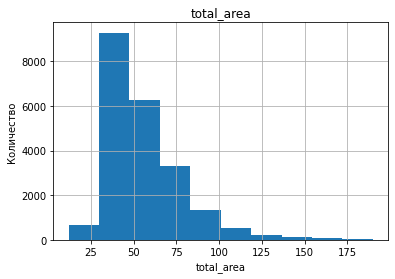

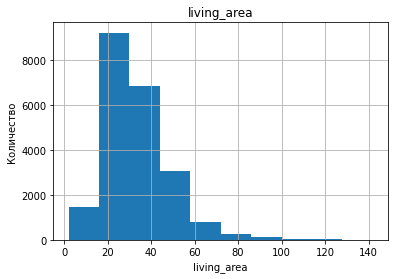

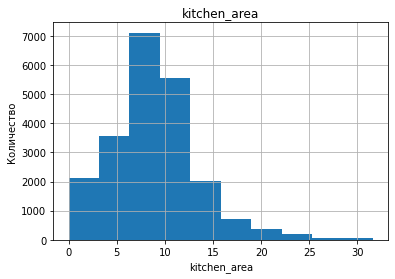

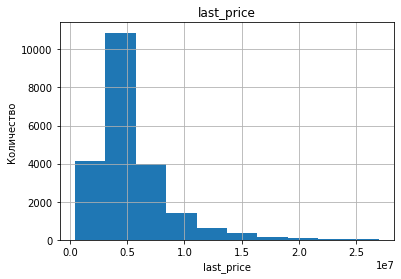

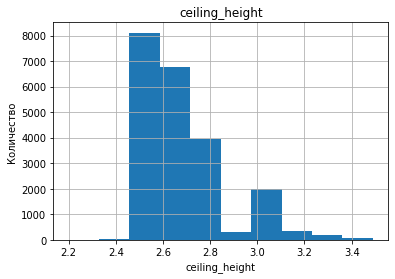

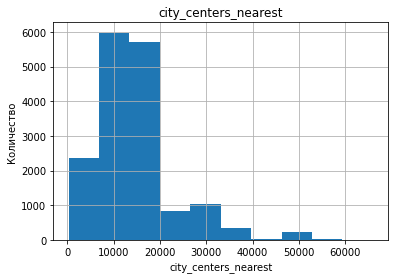

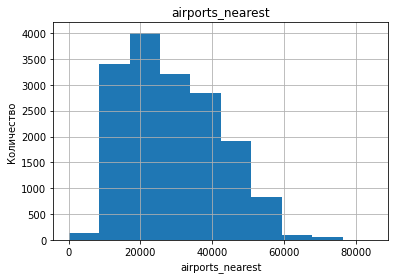

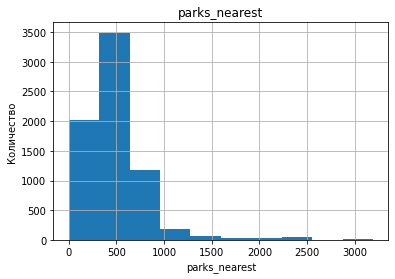

In [90]:
for parametr in ['total_area', 'living_area', 'kitchen_area', 'last_price', 'ceiling_height', \
                 'city_centers_nearest', 'airports_nearest', 'parks_nearest']:
    data.hist(parametr)
    plt.xlabel(parametr)
    plt.ylabel('Количество')

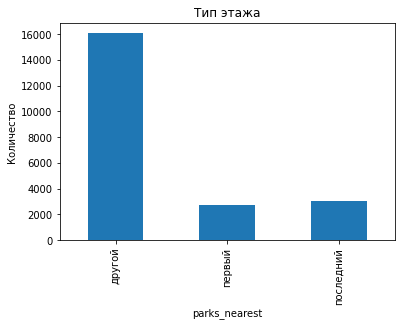

In [91]:
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', y='count')
plt.title('Тип этажа')
plt.xlabel(parametr)
plt.ylabel('Количество')
plt.show()

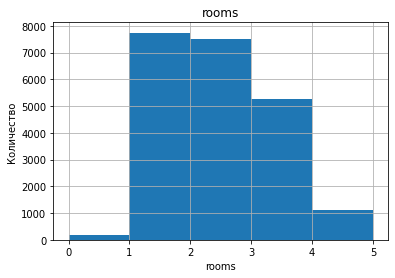

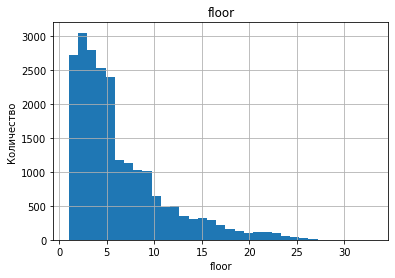

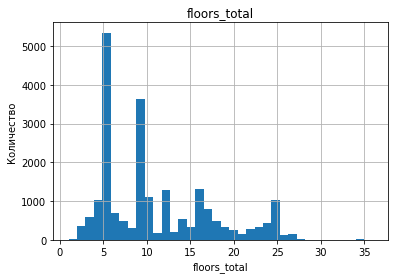

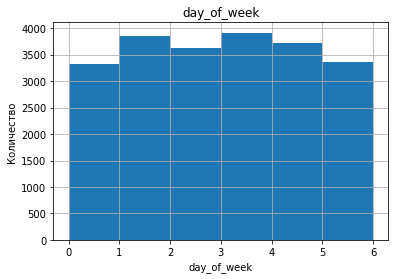

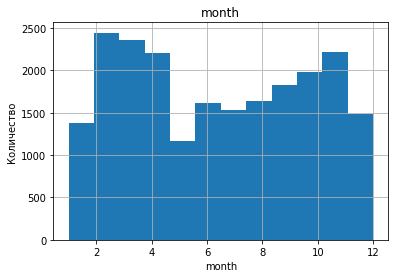

In [92]:
for parametr in ['rooms', 'floor', 'floors_total', 'day_of_week', 'month']:
    data.hist(parametr, bins=data[parametr].max())
    plt.xlabel(parametr)
    plt.ylabel('Количество')
plt.show()

Выводы для различных параметров недвижимости:
- общая площадь

Большая часть недвижимости имеет площадь от 28 до 49 кв.м. Есть небольшой хвост в правой части гистограммы из-за того, что было принято решение оставить предполагаемую элитную недвижимость. 
- жилая площадь

Большая часть жилой площади недвижимости варьируется от 18 до 30 кв.м. Так же есть небольшой хвост в правой части графика из-за элитной недвижимости.
- площадь кухни

Большая часть недвижимости имеет площадь кухни от 7 до 9 кв.м. С хвостом такая же ситуация.
- цена объекта

Большая часть недвижимости имеет цену от 3 000 000 до 5 500 000. С хвостом такая же ситуация.
- количество комнат

Больше всего 2 и 3-комнатных квартир.
- высота потолков

Высота потолков имеет два пика: на 2.5 и на 3 м, что вполне логично, учитывая распространённость типичной застройки с такой высотой потолков.
- этаж квартиры

Больше всего квартир находится на 2 этаже. Но так же достаточно большая часть квартир располагается на 1 и 3-5 этажах. Это логично, учитывая малоэтажность застройки Санкт-Петербурга.
- тип этажа квартиры («первый», «последний», «другой»)

Большая часть квартир имеет тип этажа "другой", что вполне логично, не первых и не последних этажей в доме больше.
- общее количество этажей в доме

Есть два пика: 5 и 9 этажей, что можно объяснить типичностью застройки, дома с таким количеством этажей встречаются чаще всего.
- расстояние до центра города в метрах

В основном недвижимость находится в пределах от 7.5 м до 20 км от центра города.
- расстояние до ближайшего аэропорта

Расстояние до ближайшего аэропорта составляет от 19 до 25 км. от недвижимости.
- расстояние до ближайшего парка

Ближайший парк в основном находится от 300 до 700 метров от недвижимости.
- день и месяц публикации объявления

Объявления публикуются достаточно регулярно, есть просадки в понедельник и воскресенье. Неохотнее всего недвижимость выставляют на продажу в январе, мае и декабре.

### Как быстро продавались квартиры

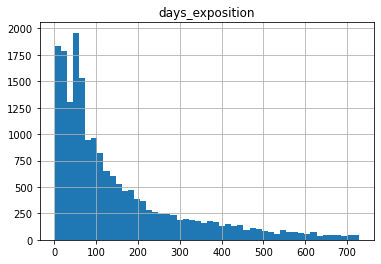

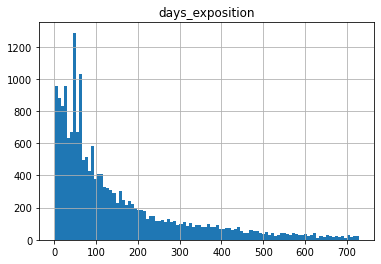

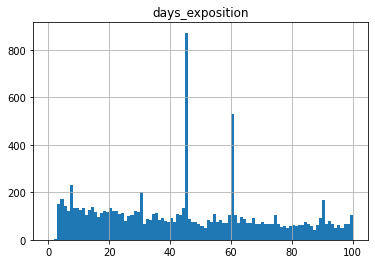

In [93]:
data.hist('days_exposition', bins=50)
data.hist('days_exposition', bins=100)
data.hist('days_exposition', bins=100, range=(0, 100))
plt.show()

In [94]:
print(f'Среднее время продажи квартиры: {data["days_exposition"].mean():.0f}')
print(f'Медианное время продажи квартиры: {data["days_exposition"].median():.0f}')

Среднее время продажи квартиры: 148
Медианное время продажи квартиры: 90


На гистограмме можно увидеть выбросы на 7, 30, 45, 60 и 90 днях. Природа этих выбросов неизвестна, но можно предположить, что у сайтов есть определённое количество дней размещения, после которых объявления удаляются автоматически.

*Быстрыми продажами* можно считать продажи, занимающие по времени *менее 90 дней*, ориентируясь на медиану и гистограмму, данных значений больше всего.

*Долгими продажами* можно считать продажи, занимающие по времени *более 148 дней*, ориентируясь на среднее значение. Но конечно среднее явно искажено продажами, которые находятся на сайте более года. Предположительно такие объявления просто не снимают с сайта после продажи.

### Влияние факторов на стоимость объекта

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

In [95]:
for factor in ['total_area', 'living_area', 'kitchen_area', 'rooms']:
    print(f'Корреляция между "last_price" и {factor} составляет: {data["last_price"].corr(data[factor]):.2f}')

Корреляция между "last_price" и total_area составляет: 0.77
Корреляция между "last_price" и living_area составляет: 0.63
Корреляция между "last_price" и kitchen_area составляет: 0.44
Корреляция между "last_price" и rooms составляет: 0.47


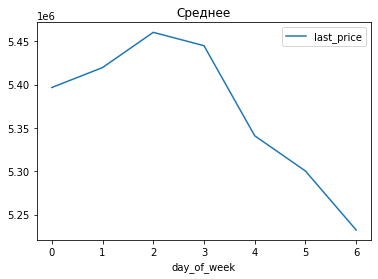

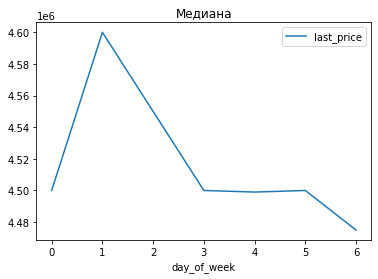

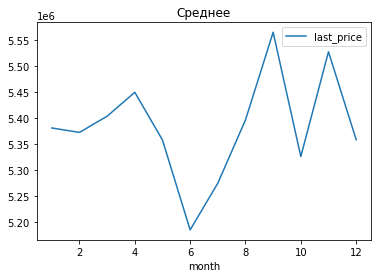

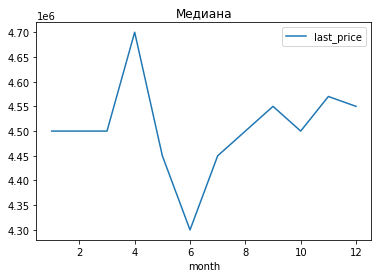

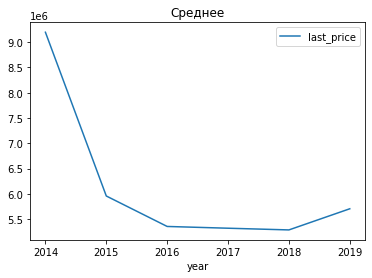

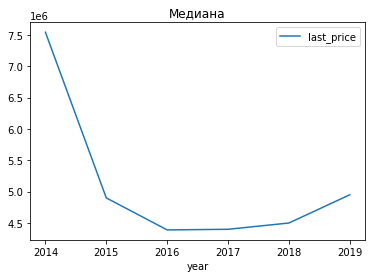

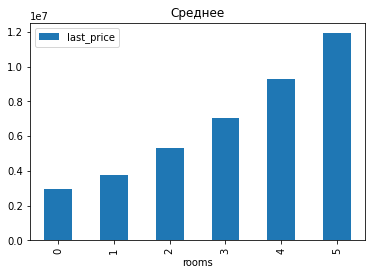

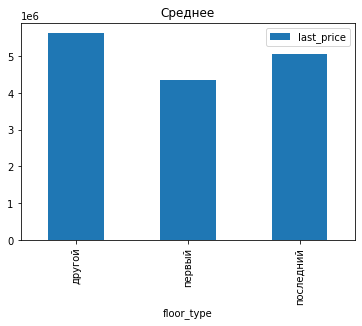

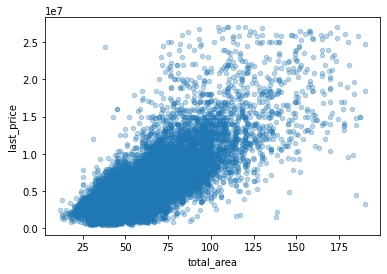

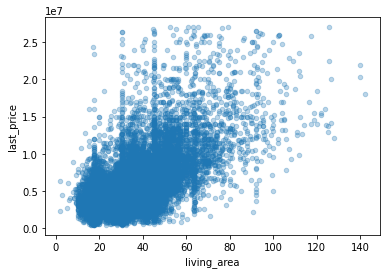

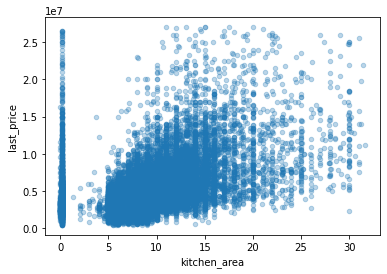

In [96]:
for parametr in ['day_of_week', 'month', 'year']:
    data.pivot_table(index=parametr, values='last_price').plot(y='last_price', kind='line', title='Среднее')
    data.pivot_table(index=parametr, values='last_price', aggfunc='median').plot(y='last_price', kind='line', title='Медиана')
    
data.pivot_table(index='rooms', values='last_price').plot(y='last_price', kind='bar', title='Среднее')
data.pivot_table(index='floor_type', values='last_price').plot(y='last_price', kind='bar', title='Среднее')

for parametr in ['total_area', 'living_area', 'kitchen_area']:
    data.plot(x=parametr, y='last_price', kind='scatter', alpha=0.3)
plt.show()

**Выводы:** 

Можем наблюдать сильную положительную взаимосвязать между ценой на объект и общей площадью, жилой площадью, площадью кухни и количеством комнат. ***Больше всего на стоимость объекта влияет общая площадь***

По графикам можно заметить такие закономерности:

Цена на недвижимость растёт в зависимости от количества комнат, **больше комнат-выше цена**.

**Тип этажа не сильно влияет на цену объекта**, но можно увидеть, что чуть больше людей всё же предпочитают не первый и не последний этаж, первый этаж совсем не пользуется популярностью.

На графиках жилой площади, общей площади и площади кухни, можем заметить большое скопление точек, что указывает на то, что **на рынке преобладает небольшая недвижимость за относительно небольшие деньги**. Хвост тянется к верхнему правому углу достаточно равномерно, можно сделать вывод, что с увеличение данных параметров растёт и цена объектов.

### Средняя цена за квадратный метр для населённых пунктов с большим числом объявлений

In [97]:
#Выбираем топ-10 городов с большим количеством объявлений
top_localities = data.value_counts('locality_name').head(10)
top_localities

locality_name
Санкт-Петербург      14220
поселок Мурино         533
поселок Шушары         426
Всеволожск             381
Пушкин                 337
Колпино                331
поселок Парголово      319
Гатчина                291
деревня Кудрово        279
Выборг                 217
dtype: int64

In [98]:
#Считаем среднюю цену за 1 кв.м.
data.query('locality_name in (@top_localities.index)')\
.pivot_table(index='locality_name', values='one_square_meter_price')\
.astype(int)\
.sort_values('one_square_meter_price', ascending=False)

,one_square_meter_price
locality_name,
Санкт-Петербург,109414
Пушкин,102025
деревня Кудрово,92688
поселок Парголово,90179
поселок Мурино,85714
поселок Шушары,78525
Колпино,75262
Гатчина,68838
Всеволожск,68685


Самая высокая цена в Санкт-Петербурге: 109414 за кв.м.

Самая низкая цена в Выборге: 57749 за кв.м.

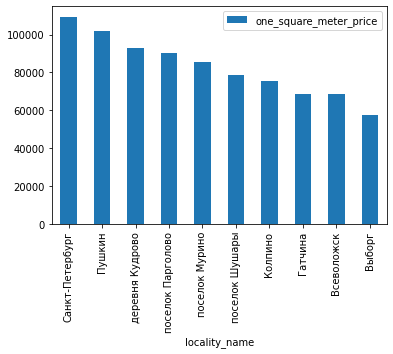

In [99]:
data.query('locality_name in (@top_localities.index)')\
.pivot_table(index='locality_name', values='one_square_meter_price')\
.astype(int)\
.sort_values('one_square_meter_price', ascending=False)\
.plot(kind='bar')
plt.show()

### Средняя цена за километр удалённости от Санкт-Петербурга

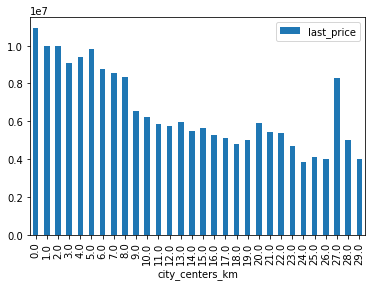

In [100]:
data[data['locality_name'] == 'Санкт-Петербург']\
.pivot_table(index='city_centers_km', values='last_price')\
.plot(kind='bar')
plt.show()

Цена до 1 км от центра города, ожидаемо, самая высокая.

От 1 до 7 км от центра цены так же достаточно высокие, после 7 км. наблюдается сильная просадка.

Есть выброс на 27 километрах, возможно примерно в этой районе располагается элитная недвижимость. Примерно в этом же районе находится Царское село и Павловск.

In [101]:
data[data['city_centers_km'] == 27]['one_square_meter_price'].mean()

99250.46

## Общий вывод

Подводя общие итоги по исследованию, можно сделать такие выводы:

**Недвижимость в центре Санкт-Петербурга ожидаемо самая дорогая.**

Но так же есть неожиданный выброс на 27 км от города, цена в этом сегменте находится на уровне недвижимости с удалённостью 8 км от центра. Цена за кв.м. для такой недвижимости соответствует 99250, что всего на ~10 000 меньше, чем в среднем по Санкт-Петербургу.

Было так же выяснено, что **больше всего на цену недвижимости влияет общая площадь квартиры**, а не количество комнат в ней, хотя казалось бы эти параметры имеют достаточно сильную связь.

Так же **предпочтения отдают квартирам, которые не находятся на крайних этажах, т.е. на первом и на последнем**.

*В топ 10 городов* с большим количеством объявлений ожидаемо *попали самые крупные города области*: Гатчина, Мурино, Всеволожск и Выборг.

На рынке преобладает небольшая недвижимость за относительно небольшие деньги, но так же есть и достаточно крупные представители с высокой стоимостью.

Т.к. хотелось провести анализ именно по всей недвижимости Ленинградской области, а не только по средненькой и не выбивающейся, то на графиках и в коэффициенте корреляции Пирсона видны некоторые выбросы. Возможно при следующем исследовании, рынок элитной недвижимости я бы исследовала отдельно, но было интересно посмотреть, как сильно она выбивает на общем фоне рынка недвижимости.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [х]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения там, где это возможно
- [х]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  устранены неявные дубликаты в названиях населённых пунктов
- [х]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [х]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [х]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [х]  посчитано и добавлено в таблицу: месяц публикации объявления
- [х]  посчитано и добавлено в таблицу: год публикации объявления
- [х]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [х]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [х]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [х]  построены гистограммы для каждого параметра
- [х]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [х]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [х]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [х]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [х]  в каждом этапе есть промежуточные выводы
- [х]  есть общий вывод